In [24]:
import rasterio
import os
import math
import matplotlib.pyplot as plt
from PIL import Image


In [25]:
def split_tif_into_grid(input_file, output_dir, grid_size):
    # Open the input .tif file
    with rasterio.open(input_file) as src:
        # Get the dimensions of the input file
        width = src.width
        height = src.height

        # Calculate the number of rows and columns in the grid
        num_cols = math.ceil(width / grid_size[0])
        num_rows = math.ceil(height / grid_size[1])

        # Iterate over each grid cell
        for row in range(num_rows):
            for col in range(num_cols):
                # Compute the pixel coordinates for the current grid cell
                xmin = col * grid_size[0]
                ymin = row * grid_size[1]
                xmax = min(xmin + grid_size[0], width)
                ymax = min(ymin + grid_size[1], height)

                # Read the data for the current grid cell for all bands
                data = src.read(window=((ymin, ymax), (xmin, xmax)))

                # Create a new .tif file name for the grid cell
                grid_file = os.path.join(output_dir, f"grid_{xmin}_{ymin}_{grid_size[0]}_{grid_size[1]}.tif")
                png_file = os.path.join(output_dir, f"grid_{xmin}_{ymin}_{grid_size[0]}_{grid_size[1]}.png")
                
                # Get the metadata for the grid cell
                grid_meta = src.meta.copy()
                grid_meta.update(width=xmax - xmin, height=ymax - ymin, transform=src.transform)

                # Write the grid cell data to a new .tif file
                with rasterio.open(grid_file, 'w', **grid_meta) as dst:
                    dst.write(data)

                # Save the grid cell as a PNG
                image = Image.fromarray(data.transpose(1, 2, 0))
                image.save(png_file)


def plot_tif_color(tif_file):
    # Open the TIFF file
    with rasterio.open(tif_file) as src:
        # Read the image data for all bands
        data = src.read()

        # Transpose the data to match the shape expected by matplotlib (bands, rows, columns)
        data = data.transpose(1, 2, 0)

        # Display the image
        plt.figure(figsize=(10, 10))
        plt.imshow(data)
        plt.title('Color TIFF Image')
        plt.show()

# Usage
input_file = '../orthoimages/swissimage-dop10_2021_2599-1200_0.1_2056.tif'
output_dir = '../grid'
grid_size = (500, 500)  # Custom grid size (width, height) in pixels

split_tif_into_grid(input_file, output_dir, grid_size)


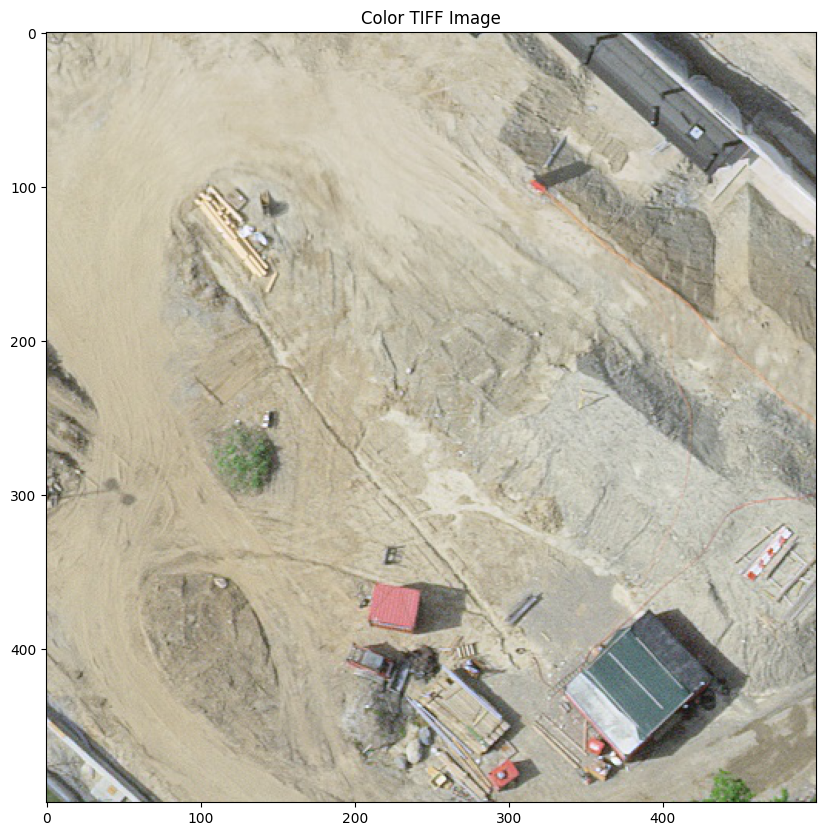

In [21]:
# Usage
plot_tif_color("../grid/grid_0_10.tif")
